Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not
Marital.Status : marital status of a person
Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 
Work Experience : Work experience of an individual person
Urban : Whether that person belongs to urban area or not


In [22]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [23]:
# To avoid  warnings
import warnings
warnings.filterwarnings('ignore')

In [24]:
data=pd.read_csv('Fraud_check.csv')
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [25]:
#it shows all rows and coulmns in data
data.shape

(600, 6)

# EDA And Visualization

In [26]:
# information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [27]:
#check duplicated values
data.duplicated().sum()#There is no duplicated value present in dataset.

0

In [28]:
#check correlation
data.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


<AxesSubplot:>

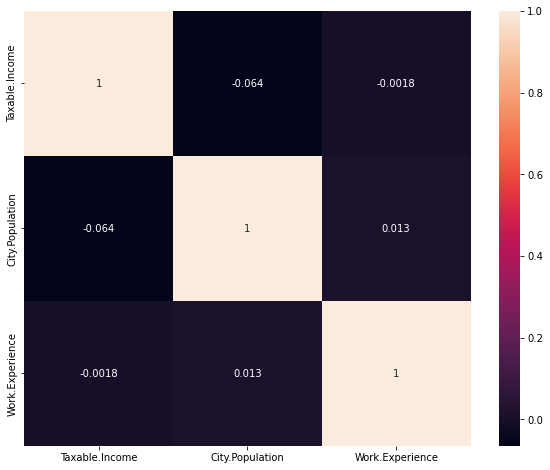

In [29]:
#Plot heatmap to see rectangular data as a color-encoded matrix.
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True)

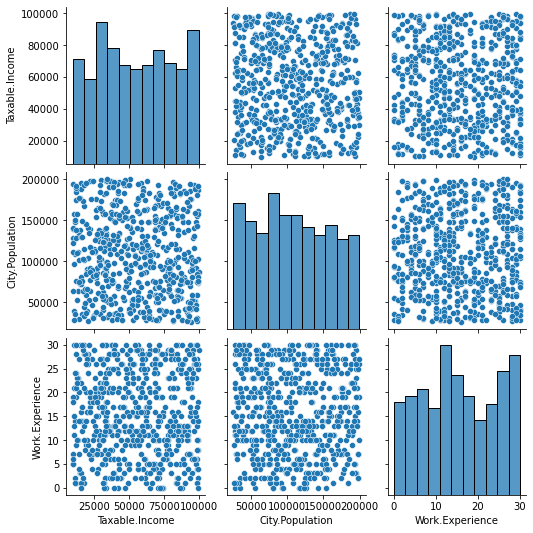

In [30]:
#plot pairplot to visualize pairwise relationship of all the atributes at once.
sns.pairplot(data)

<AxesSubplot:>

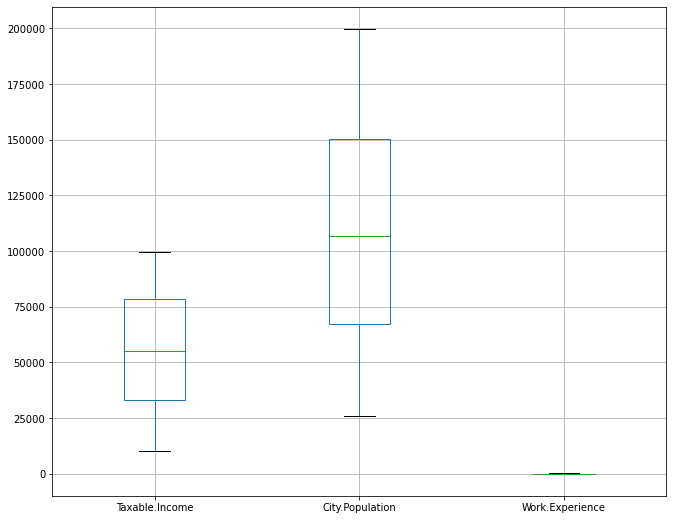

In [31]:
#plot boxplot to visualize distribution of all the numerical columnns at once..
plt.figure(figsize=(11,9))
pd.DataFrame(data=data).boxplot()

The City.population is widely distributed over all other segments.

Taxable income is lies between 15k to 100k.It is the amount of how much tax an individual owes to the government. 

<AxesSubplot:>

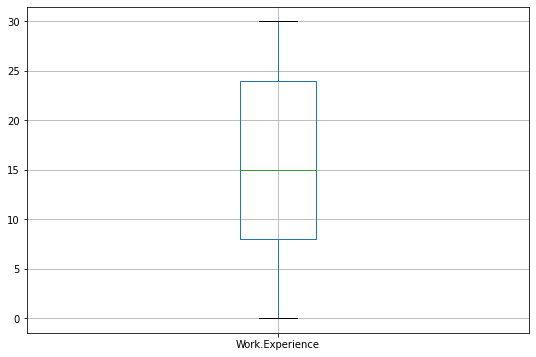

In [32]:
plt.figure(figsize=(9,6))
pd.DataFrame(data=data['Work.Experience']).boxplot()

In [33]:
# dropping first dummy variable
df=pd.get_dummies(data,columns=['Undergrad','Marital.Status','Urban'], drop_first=True)
df.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0


In [34]:
#Creating new cols Result and dividing 'Taxable.Income' cols on the basis of [10002,30000,99620] for Risky and Good
df["Result"] = pd.cut(df["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])
df.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Result
0,68833,50047,10,0,0,1,1,Good
1,33700,134075,18,1,0,0,1,Good
2,36925,160205,30,0,1,0,1,Good
3,50190,193264,15,1,0,1,1,Good
4,81002,27533,28,0,1,0,0,Good


 Lets assume: Taxable_income <= 30000 as “Risky=0” and others are “Good=1”

#After creation of new col. TaxInc also made its dummies var concating right side of df
df = pd.get_dummies(df,columns = ["Result"],drop_first=True)
df.head()

# Feature & Target

In [38]:
#Define Feature
X=df.drop(['Taxable.Income','Result'],axis=1)
print(X.shape)
X.head()

(600, 6)


,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,50047,10,0,0,1,1
1,134075,18,1,0,0,1
2,160205,30,0,1,0,1
3,193264,15,1,0,1,1
4,27533,28,0,1,0,0


In [39]:
#Defining Target
Y=pd.DataFrame(df['Result'])
print(Y.shape)
Y.head()

(600, 1)


,Result
0,Good
1,Good
2,Good
3,Good
4,Good


In [40]:
Y.value_counts()

Result
Good      476
Risky     124
dtype: int64

 We conclude that 124 Person have taxable_income <= 30000, it means they are 'Risky' & Other 476 Person are 'better'

#### 1.Undergrad_YES VS Result

<AxesSubplot:xlabel='Result'>

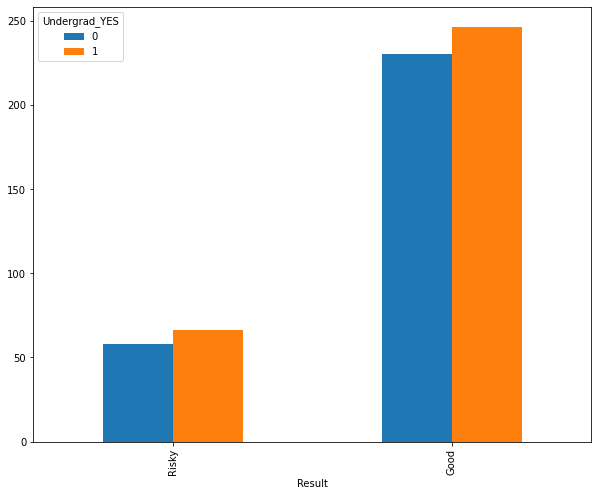

In [43]:
pd.crosstab(df['Result'],df['Undergrad_YES']).plot(kind='bar',figsize=(10,8))

From above CountPlot we considering  that Mostly UnderGraduate People are Risky.

#### 2.Marital.Status VS Result

<AxesSubplot:xlabel='Result'>

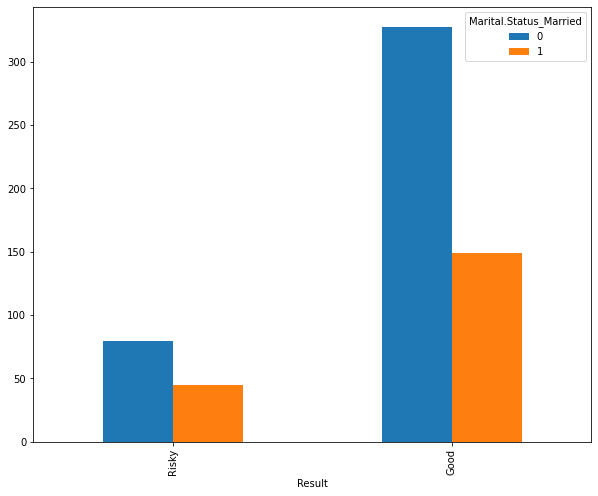

In [47]:
pd.crosstab(df['Result'],df['Marital.Status_Married']).plot(kind='bar',figsize=(10,8))

From above Crosstab we conclude that total 194 person are married out of this 149 are considered Good & 45 are Risky.

<AxesSubplot:xlabel='Result'>

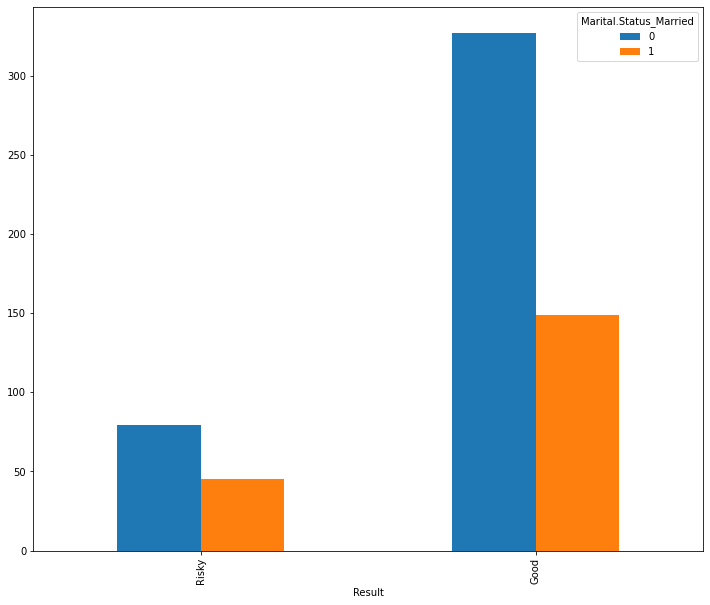

In [49]:
pd.crosstab(df['Result'],df['Marital.Status_Married']).plot(kind='bar',figsize=(12,10))

From above CountPlot we considering that Mostly Unmarried Person are Risky.

#### 3.Urban VS Result

In [51]:
pd.crosstab(df['Result'],df['Urban_YES'])

Urban_YES,0,1
Result,,
Risky,61,63
Good,237,239


From above Crosstab we conclude that total 302 person are belongs to Urban Area out of this 239 are considered Good & 63 are Risky.

Also conclude that 298 person are belongs to Rural Area out of this 237 are considered as Good & 61 are Risky.

<AxesSubplot:xlabel='Result'>

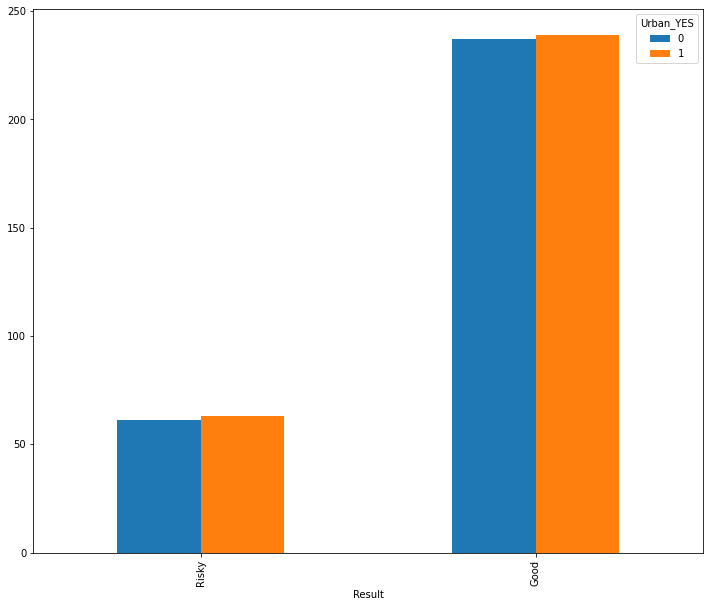

In [53]:
pd.crosstab(df['Result'],df['Urban_YES']).plot(kind='bar',figsize=(12,10))

From above CountPlot we conclude that there is no much difference between Urban & Rural areas person but still countplot shows Urban areas Person are slightly risky than Rural Areas person.

In [54]:
#split data into Train & test
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=42)

In [55]:
X_train.shape

(420, 6)

In [56]:
Y_train.shape

(420, 1)

## Building Decision Tree Classifier using Entropy Criteria

In [57]:
#set max_depth=none
dec_model=DecisionTreeClassifier(criterion='entropy',max_depth=None)
dec_model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy')

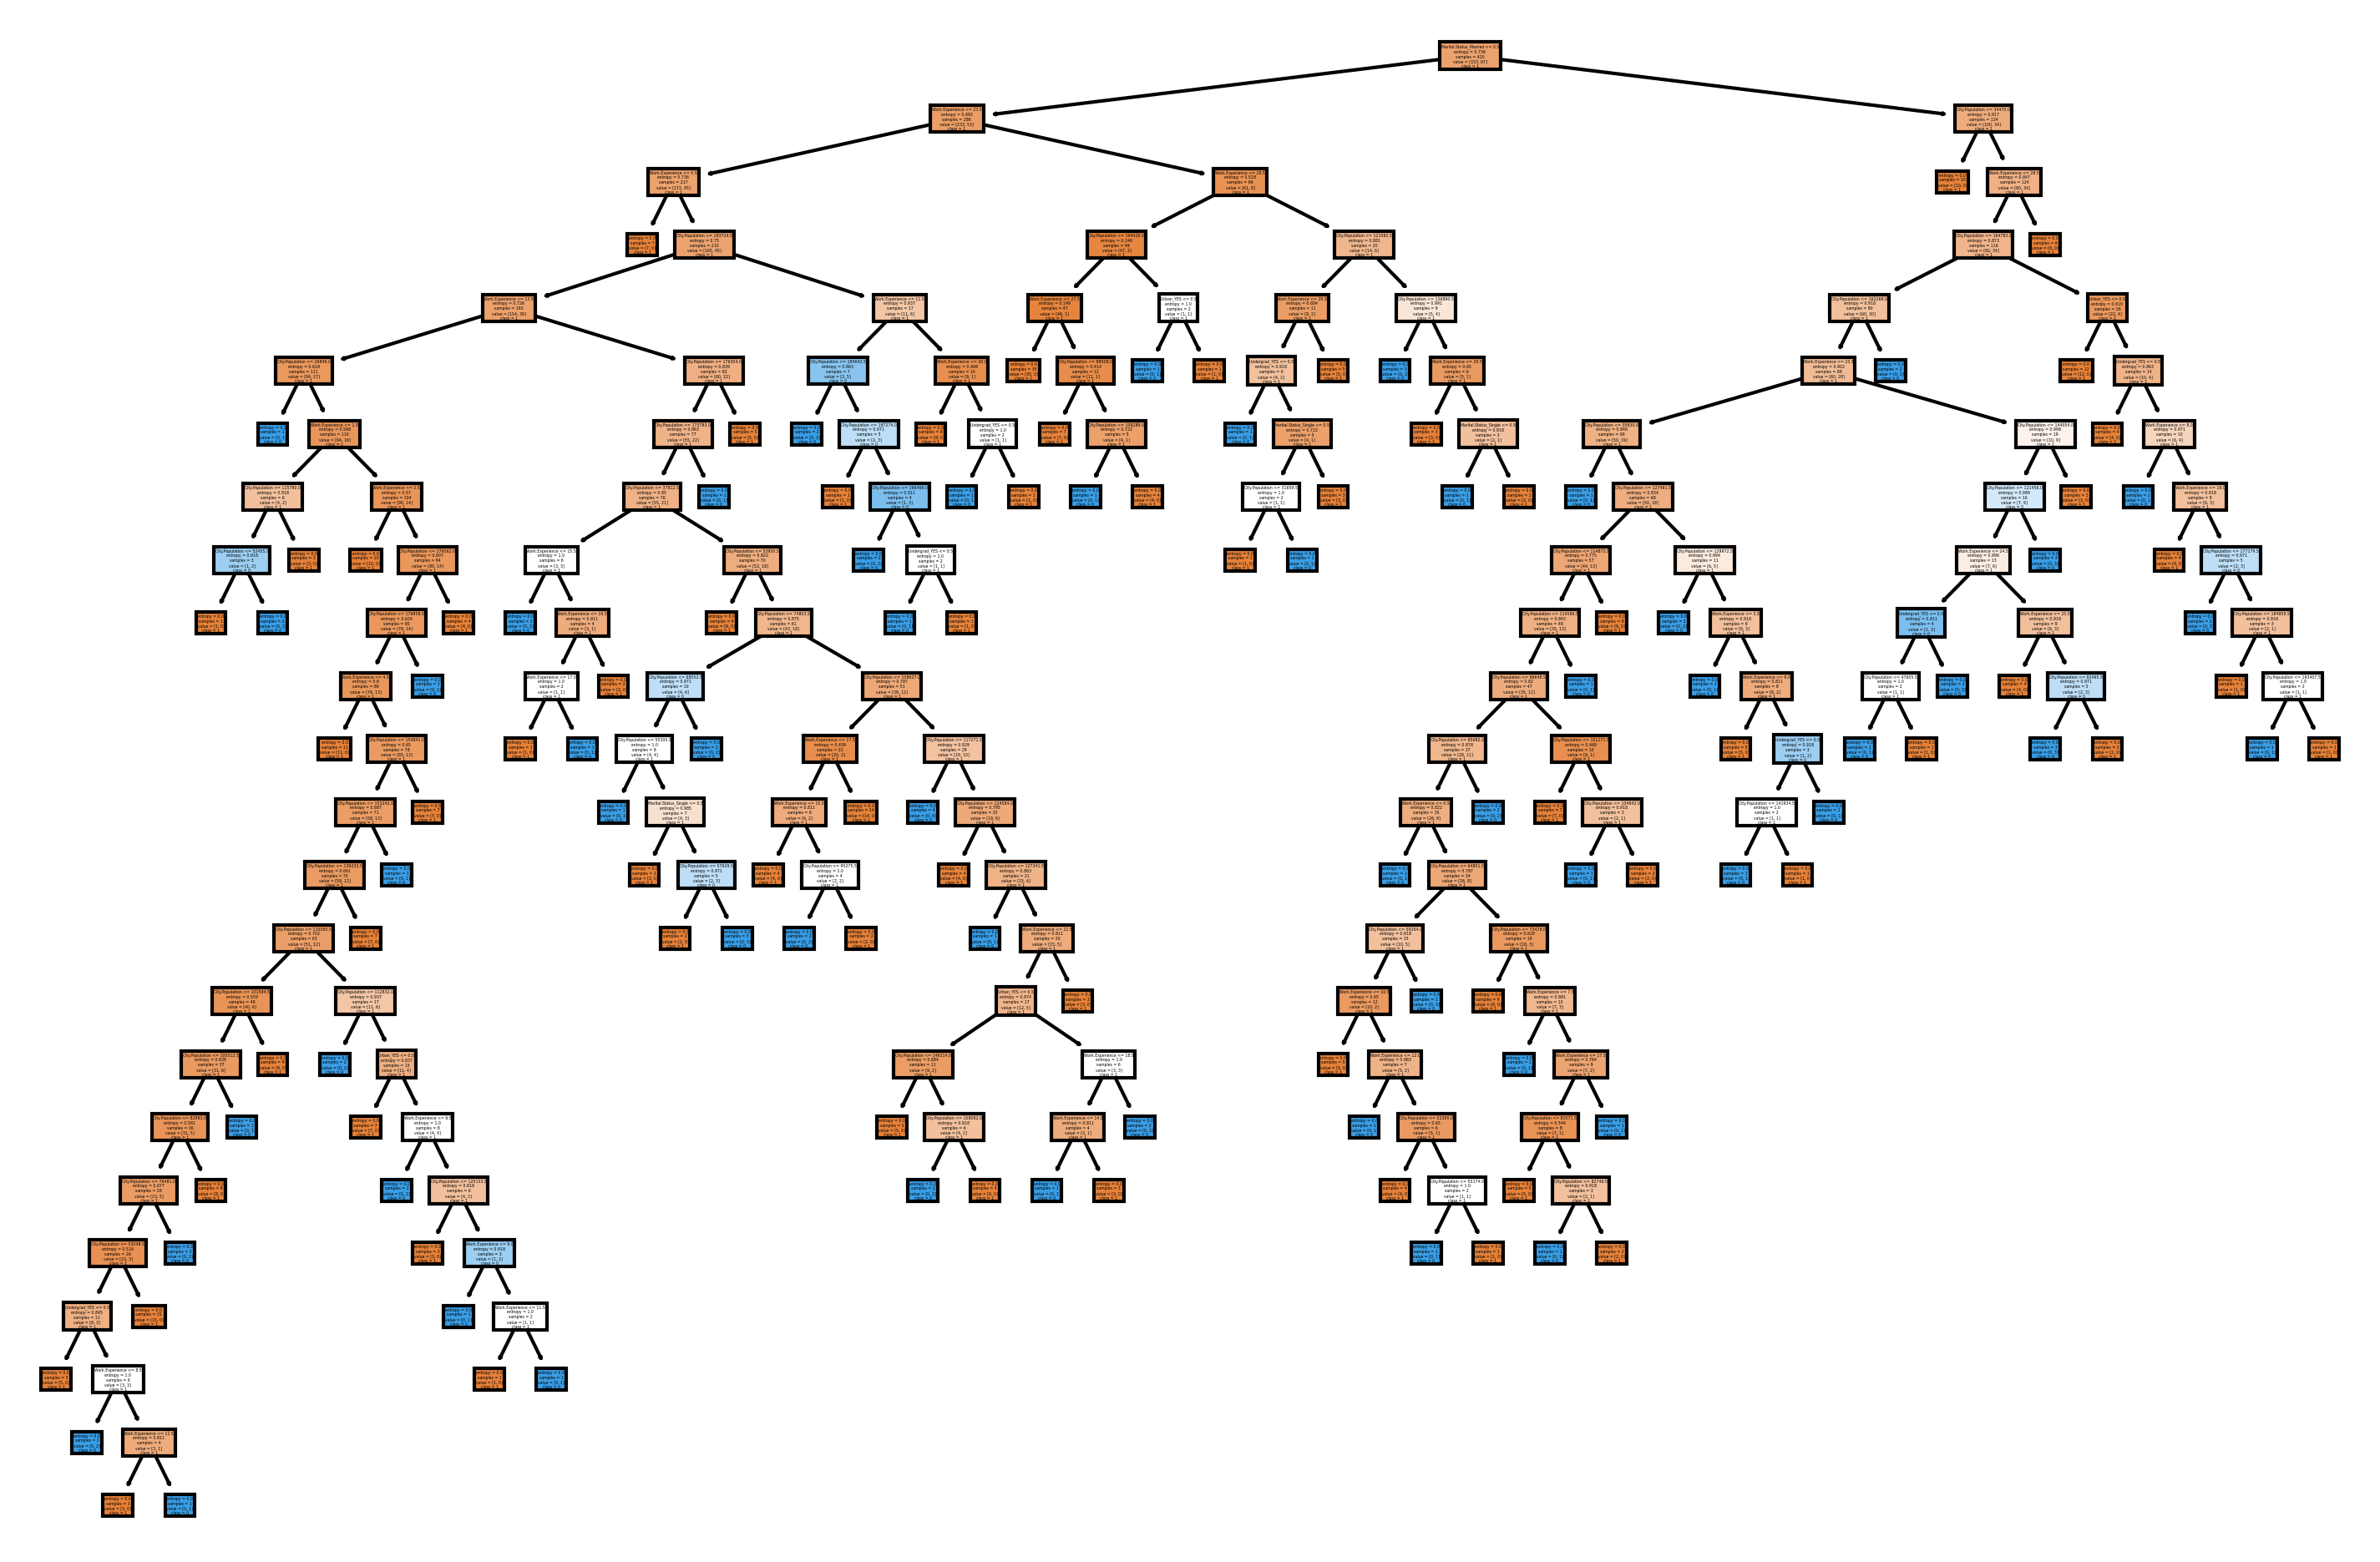

In [58]:
fn=['City.Population','Work.Experience','Undergrad_YES','Marital.Status_Married','Marital.Status_Single','Urban_YES'] # give feature names
cn=['1','0'] # make list of category (class) names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (12,8), dpi=300) # increase size using plt.subplot
tree.plot_tree(dec_model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [59]:
#Predicting on test data
preds = dec_model.predict(X_test) # predicting on test data set 
pd.Series.value_counts(preds) # getting the count of each category 

Good     133
Risky     47
dtype: int64

In [60]:
preds

array(['Risky', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Risky', 'Risky', 'Good', 'Risky', 'Good',
       'Good', 'Risky', 'Risky', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good', 'Risky',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Risky', 'Good', 'Good', 'Risky', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', '

In [61]:
#check training accuracy
dec_model.score(X_train,Y_train) 

1.0

In [62]:
#check testing accuracy
dec_model.score(X_test,Y_test)

0.6333333333333333

Our model is performing better on training time but performe worst on testing time that means our model is overfitted.

Model should be generalized not memorized.To avoid overfitiing we need to Performe Pruning to overcome the problem of overfitting.

## Doing hyperparameter tunning to find best parameter values.

In [63]:
hyperparameters = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_depth': [2, 3, 4, 5, 6,7],
    'min_samples_split': [2, 3, 4,5],
    'min_samples_leaf': [1, 2, 3],
}

grid_search = GridSearchCV(dec_model, hyperparameters, cv=5)
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 6, 7],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5]})

In [64]:
# Print the best hyperparameters and the corresponding score
print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Best hyperparameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 0.7880952380952382


In [65]:
#set max_depth=none
final_model=DecisionTreeClassifier(criterion='gini',max_depth=3)
final_model.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3)

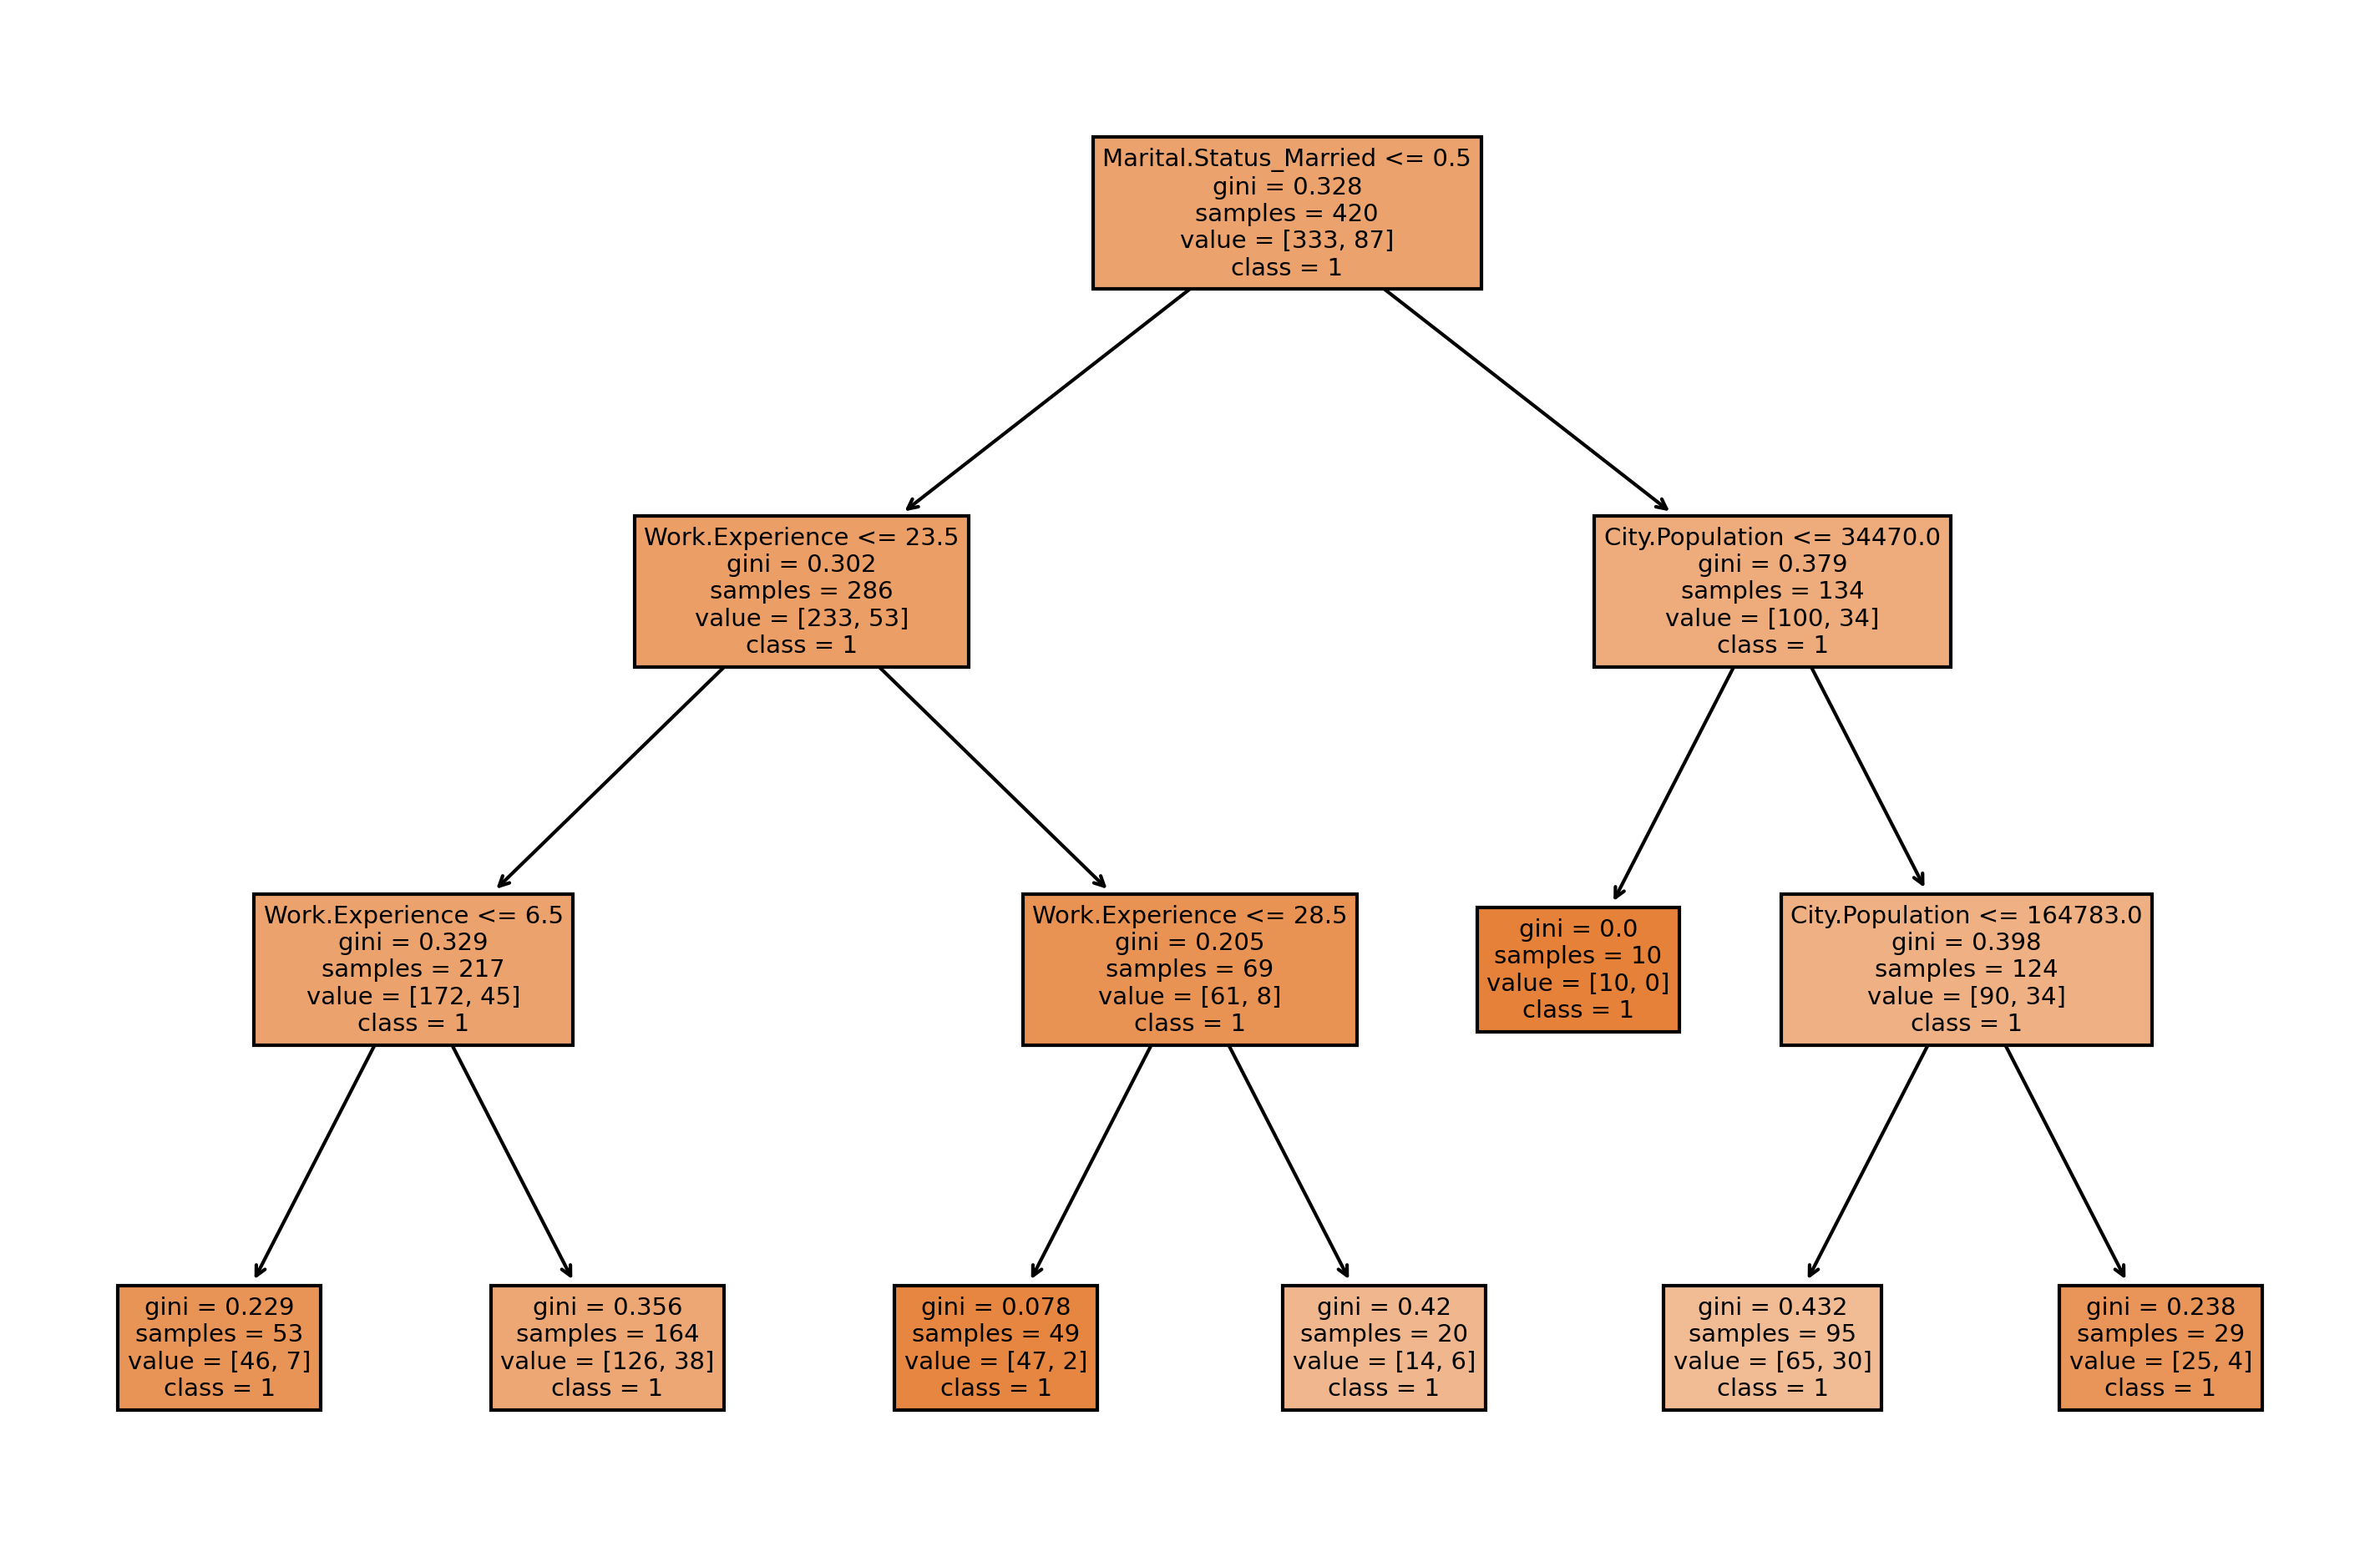

In [69]:
fn=['City.Population','Work.Experience','Undergrad_YES','Marital.Status_Married','Marital.Status_Single','Urban_YES']
cn=['1','0'] # make list of category (class) names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (12,8), dpi=300) 
tree.plot_tree(final_model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [70]:
#check training accuracy
final_model.score(X_train,Y_train) 

0.7928571428571428

In [71]:
# model accuracy on test data is 79% good from previous model

In [72]:
#Check testing accuracy
final_model.score(X_test, Y_test) 

0.7944444444444444

conclusion:-After doing hyperparameter tunning our model give accuracy around 79% better than previous model